# CMB Lensing Constraints on Late Time Growth of Structures

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib.offsetbox import AnchoredText
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.integrate import quad
from matplotlib import pyplot as plt
from scipy import stats as s
import numpy as np
import pandas as pd
from matplotlib import rcParams
from matplotlib import animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from getdist.mcsamples import MCSamplesFromCobaya
import scipy.stats as st
from getdist import plots, MCSamples,gaussian_mixtures,loadMCSamples
from planck_lensing_external.plancklensing import PlanckLensingMarged
from planck_lensing_external import plancklensing
from getdist.densities import Density2D
import getdist.plots as gplot
camb_path='/home/Aruna/anaconda3/lib/python3.9/site-packages/camb'
# sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.6 installed at /home/Aruna/CAMB/camb


In [1]:
#smicadx12_Dec5_ftl_mv2_ndclpp_p_teb_consext8_bandpowers.dat

In [8]:
dat_file = pd.read_csv("/home/Aruna/planck_lensing_external/plancklensing/data_2018/smicadx12_Dec5_ftl_mv2_ndclpp_p_teb_consext8_bandpowers.csv")
dat_file

,bin,L_min,L_max,L_av,PP,Error,Ahat
0,1,8,40,28.07,1.470000e-07,1.320000e-08,1.052
1,2,41,84,63.57,1.320000e-07,6.810000e-09,1.036
2,3,85,129,106.31,1.000000e-07,5.020000e-09,1.011
3,4,130,174,150.55,7.040000e-08,4.590000e-09,0.924
4,5,175,219,195.27,5.290000e-08,4.570000e-09,0.884
5,6,220,264,240.40,4.210000e-08,4.890000e-09,0.869
6,7,265,309,285.88,4.300000e-08,4.410000e-09,1.073
7,8,310,354,331.45,3.940000e-08,4.680000e-09,1.165
8,9,355,400,377.28,2.550000e-08,4.490000e-09,0.885


In [8]:
cl_camb=results.get_lens_potential_cls(2500) 

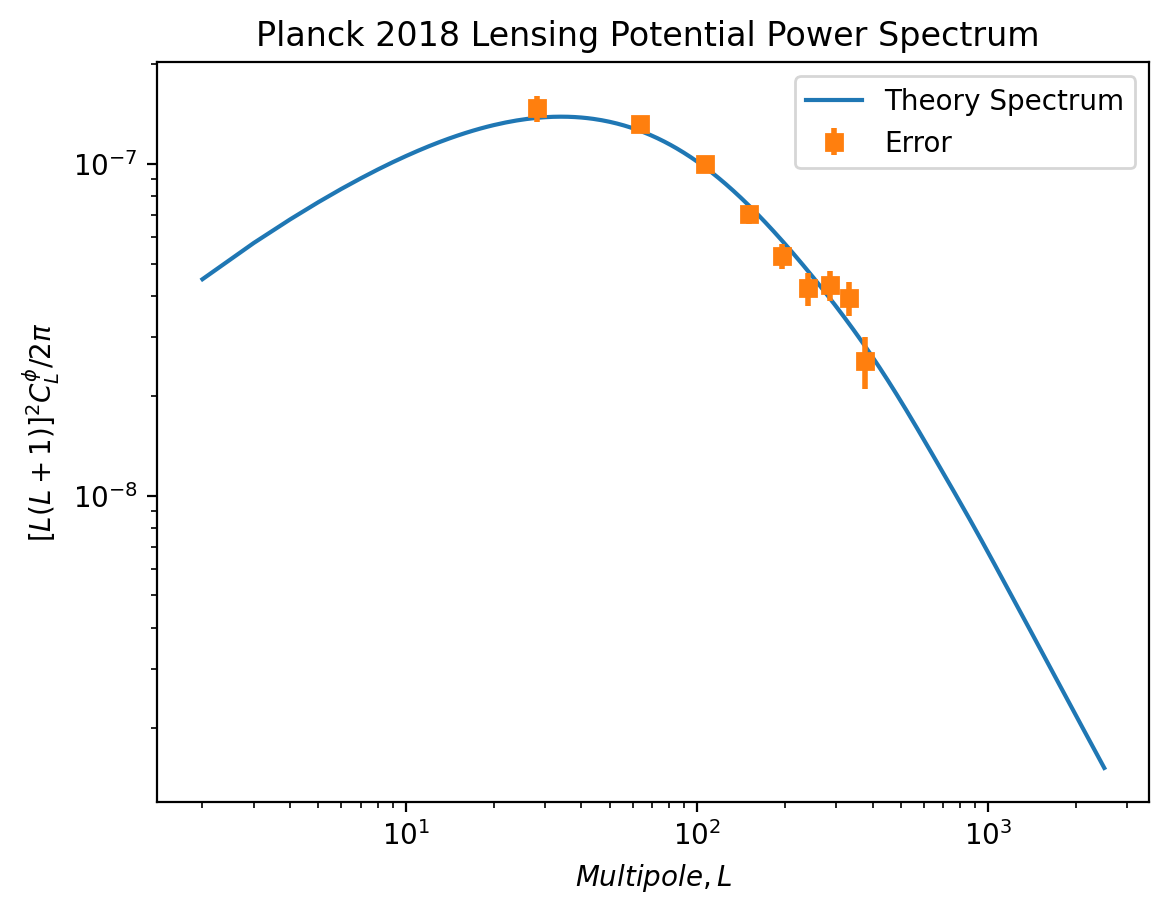

In [10]:
x=dat_file["L_av"]
y=dat_file["PP"]
plt.loglog(ls,cl_limber)

plt.errorbar(x,y, yerr=dat_file["Error"],fmt='s',elinewidth=2, lw=0)

plt.legend(["Theory Spectrum","Error"])
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.title('Planck 2018 Lensing Potential Power Spectrum ')
plt.xlabel('$Multipole, L$');
# plt.loglog(np.arange(2,cl_camb[:,0].size),cl_camb[2:,0], color='r')

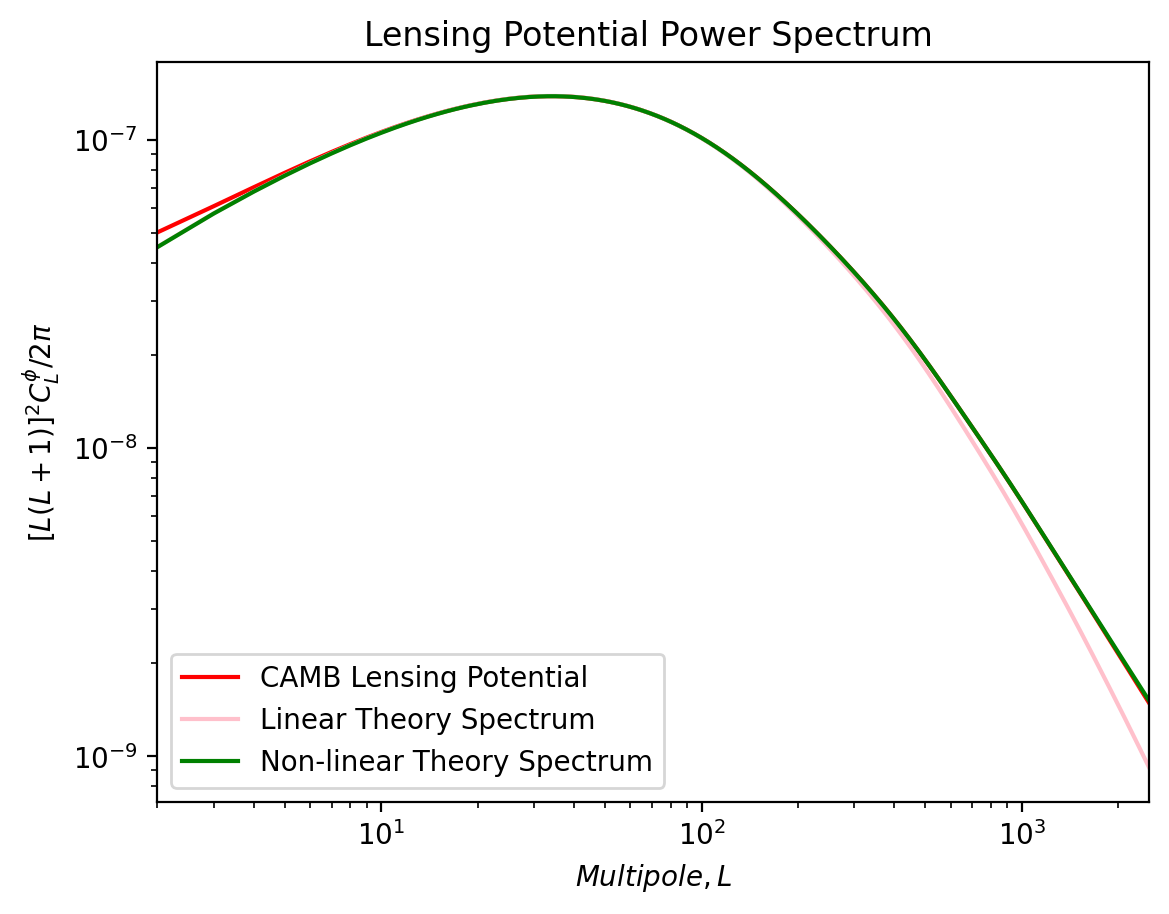

In [49]:
pars.set_for_lmax(2500,lens_potential_accuracy=2)
results = camb.get_results(pars)
cl_camb=results.get_lens_potential_cls(2500)
plt.loglog(np.arange(2,cl_camb[:,0].size),cl_camb[2:,0], color='red')
plt.xlim([2,2501])
plt.loglog(ls,cl_limber1, color='pink')
plt.loglog(ls,cl_limber,'green')
plt.legend(["CAMB Lensing Potential","Linear Theory Spectrum","Non-linear Theory Spectrum"])
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.title('Lensing Potential Power Spectrum ')
plt.xlabel('$Multipole, L$');

In [ ]:
#calculate results for these parameters
results = camb.get_results(pars)
results

In [2]:
#For calculating large-scale structure and lensing results yourself, get a power spectrum
#interpolation object. In this example we calculate the CMB lensing potential power
#spectrum using the Limber approximation, using PK=camb.get_matter_power_interpolator() function.
#calling PK(z, k) will then get power spectrum at any k and redshift z in range.

nz = 400 #number of steps to use for the radial/redshift integration
kmax=20  #kmax to use
#First set up parameters as usual
pars = camb.CAMBparams()
pars1 = camb.CAMBparams()
# pars2 = camb.CAMBparams()
# pars3 = camb.CAMBparams()


pars=camb.read_ini(os.path.join(camb_path,'inifiles','planck_2018.ini'))
pars1=camb.read_ini(os.path.join(camb_path,'inifiles','planck_2018.ini'))

# pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
# pars1.set_cosmology(H0=67.5, ombh2=0.009, omch2=0.109)
# pars2.set_cosmology(H0=67.5, ombh2=0.01, omch2=0.01)
# pars3.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122,mnu=0.06, omk=0, tau=0.06)

# pars.InitPower.set_params(ns=0.965)
# pars1.InitPower.set_params(ns=0.965)
# pars2.InitPower.set_params(ns=0.965)
# pars3.InitPower.set_params(ns=0.965)

#For Limber result, want integration over \chi (comoving radial distance), from 0 to chi_*.
#so get background results to find chistar, set up a range in chi, and calculate corresponding redshifts
results= camb.get_background(pars)
results1= camb.get_background(pars1)
# results2= camb.get_background(pars2)
# results3= camb.get_background(pars3)

chistar = results.conformal_time(0)- results.tau_maxvis
chistar1 = results1.conformal_time(0)- results1.tau_maxvis
# chistar2 = results1.conformal_time(0)- results2.tau_maxvis
# chistar3 = results1.conformal_time(0)- results3.tau_maxvis

chis = np.linspace(0,chistar,nz)
chis1 = np.linspace(0,chistar1,nz)
# chis2 = np.linspace(0,chistar2,nz)
# chis3 = np.linspace(0,chistar3,nz)

zs=results.redshift_at_comoving_radial_distance(chis)
zs1=results1.redshift_at_comoving_radial_distance(chis1)
# zs2=results2.redshift_at_comoving_radial_distance(chis2)
# zs3=results3.redshift_at_comoving_radial_distance(chis3)

#Calculate array of delta_chi, and drop first and last points where things go singular
dchis = (chis[2:]-chis[:-2])/2
dchis1 = (chis1[2:]-chis1[:-2])/2
# dchis2 = (chis2[2:]-chis2[:-2])/2
# dchis3 = (chis3[2:]-chis3[:-2])/2

chis = chis[1:-1]
chis1 = chis1[1:-1]
# chis2 = chis2[1:-1]
# chis3 = chis3[1:-1]

zs = zs[1:-1]
zs1 = zs1[1:-1]
# zs2 = zs2[1:-1]
# zs3 = zs3[1:-1]

#Get the matter power spectrum interpolation object (based on RectBivariateSpline). 
#Here for lensing we want the power spectrum of the Weyl potential.
PK = camb.get_matter_power_interpolator(pars, nonlinear=True, 
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs[-1])
PK1 = camb.get_matter_power_interpolator(pars1, nonlinear=False, 
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs[-1])

In [24]:
s=results.get_sigma8_0()

In [5]:
#Get lensing window function (flat universe)
win = ((chistar-chis)/(chis**2*chistar))**2
win1 = ((chistar1-chis1)/(chis1**2*chistar1))**2
# win2 = ((chistar2-chis2)/(chis2**2*chistar2))**2
# win3 = ((chistar3-chis3)/(chis3**2*chistar3))**2

#Do integral over chi
ls = np.arange(2,2500+1, dtype=np.float64)

cl_kappa=np.zeros(ls.shape)
cl_kappa1=np.zeros(ls.shape)
# cl_kappa2=np.zeros(ls.shape)
# cl_kappa3=np.zeros(ls.shape)

w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
w1 = np.ones(chis1.shape) #this is just used to set to zero k values out of range of interpolation
# w2 = np.ones(chis2.shape) #this is just used to set to zero k values out of range of interpolation
# w3 = np.ones(chis3.shape) #this is just used to set to zero k values out of range of interpolation

for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa*= (ls*(ls+1))**2

for i, l in enumerate(ls):
    k1=(l+0.5)/chis1
    w1[:]=1
    w1[k1<1e-4]=0
    w1[k1>=kmax]=0
    cl_kappa1[i] = np.dot(dchis1, w1*PK1.P(zs1, k1, grid=False)*win1/k1**4)
cl_kappa1*= (ls*(ls+1))**2

# for i, l in enumerate(ls):
#     k2=(l+0.5)/chis2
#     w2[:]=1
#     w2[k2<1e-4]=0
#     w2[k2>=kmax]=0
#     cl_kappa2[i] = np.dot(dchis2, w2*PK.P(zs2, k2, grid=False)*win2/k2**4)
# cl_kappa2*= (ls*(ls+1))**2

# for i, l in enumerate(ls):
#     k3=(l+0.5)/chis3
#     w3[:]=1
#     w3[k3<1e-4]=0
#     w3[k3>=kmax]=0
#     cl_kappa3[i] = np.dot(dchis3, w3*PK.P(zs3, k3, grid=False)*win3/k3**4)
# cl_kappa3*= (ls*(ls+1))**2

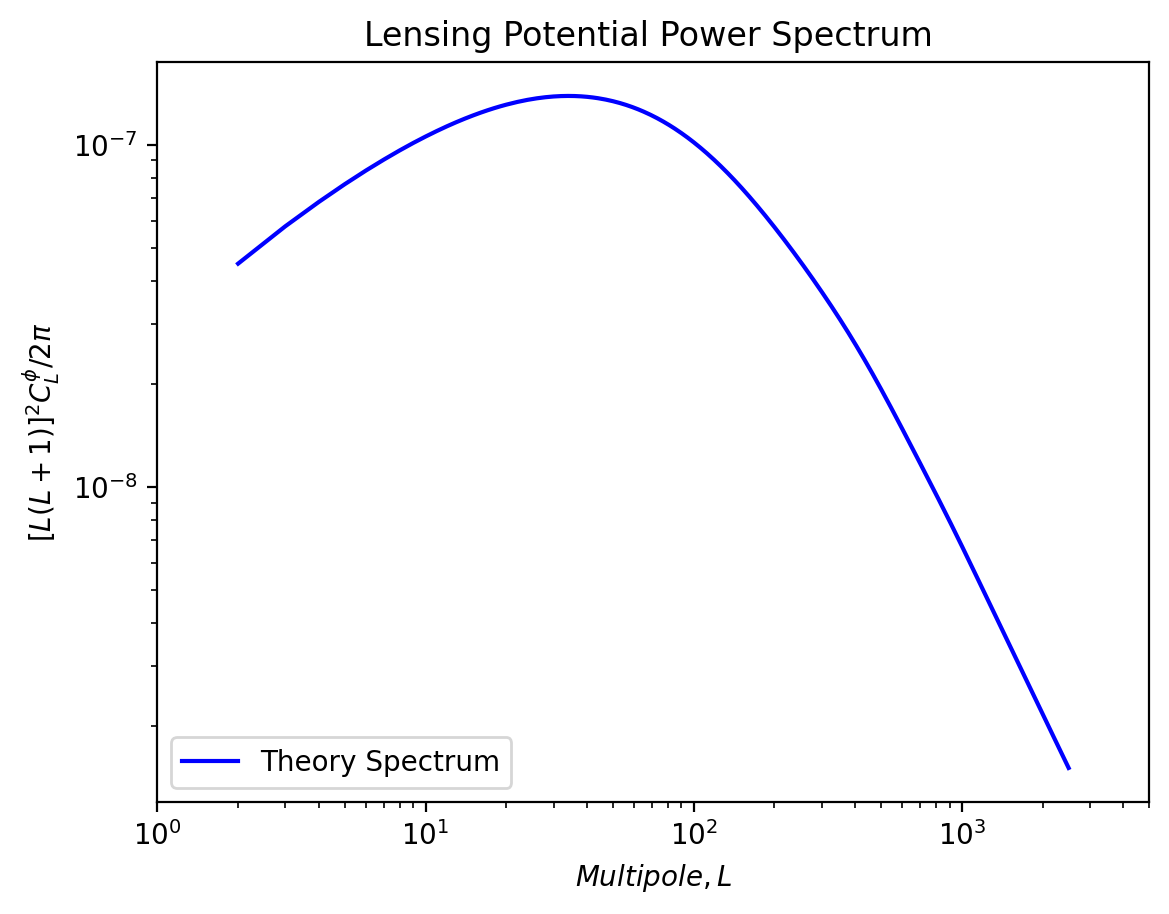

In [6]:
#Compare with CAMB's calculation:
#note that to get CAMB's internal calculation accurate at the 1% level at L~2000, 
#need lens_potential_accuracy=2. Increase to 4 for accurate match to the Limber calculation here
pars.set_for_lmax(2500,lens_potential_accuracy=2)
pars1.set_for_lmax(2500,lens_potential_accuracy=2)
# pars2.set_for_lmax(2500,lens_potential_accuracy=2)
# pars3.set_for_lmax(2500,lens_potential_accuracy=2)


results = camb.get_results(pars)
results1 = camb.get_results(pars1)
# results2 = camb.get_results(pars2)
# results3 = camb.get_results(pars3)

cl_camb=results.get_lens_potential_cls(2500) 
cl_camb1=results1.get_lens_potential_cls(2500) 
# cl_camb2=results2.get_lens_potential_cls(2500) 
# cl_camb3=results3.get_lens_potential_cls(2500) 

# cl_camb[:,0] is phi x phi power spectrum (other columns are phi x T and phi x E)

#Make plot. Expect difference at very low-L from inaccuracy in Limber approximation, and
#very high L from differences in kmax (lens_potential_accuracy is only 2, though good by eye here)
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
# cl_limber1= 4*cl_kappa1/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
# cl_limber2= 4*cl_kappa2/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
# cl_limber3= 4*cl_kappa3/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)

plt.loglog(ls,cl_limber, color='b')
# plt.loglog(ls, cl_limber1, color='r')
# plt.loglog(ls, cl_limber2, color='black')
# plt.loglog(ls, cl_limber3, color='g')


plt.xlim([1,5000])
plt.legend(['Theory Spectrum','$H_0$=67.5, $\u03A9_{b}h^{2}$=0.009, $\u03A9_{c}h^{2}$=0.109'], loc='lower left')
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.title('Lensing Potential Power Spectrum ')
plt.xlabel('$Multipole, L$');

# Power spectrum with some abritrary function

<div style="font-size: 30px">
Shifted Limber 
\begin{gather*}
  C^\phi_l = \frac{8\pi^2}{l^3} \int_0^{\chi*} dk\chi f(z)P(z,k) (\frac{\chi*-\chi}{\chi*\chi})^2
\end{gather*}
$$
Let's \ take f(z) = e^{-z^{2}}. Where, z \ is \ a \ function \ of \ \chi *
$$

In [10]:
## Original Limber
cl_kappa=np.zeros(ls.shape)
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa*= (ls*(ls+1))**2

In [11]:
## Shifted Limber with some arbitrary function f(z*) = exp(-zs**2)
cl_kappa_shifted1=np.zeros(ls.shape)
f = np.exp(-zs**2)
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa_shifted1[i] = np.dot(dchis, w*f*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa_shifted1*= (ls*(ls+1))**2

In [12]:
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
cl_limber_shifted= 4*cl_kappa_shifted1/2/np.pi

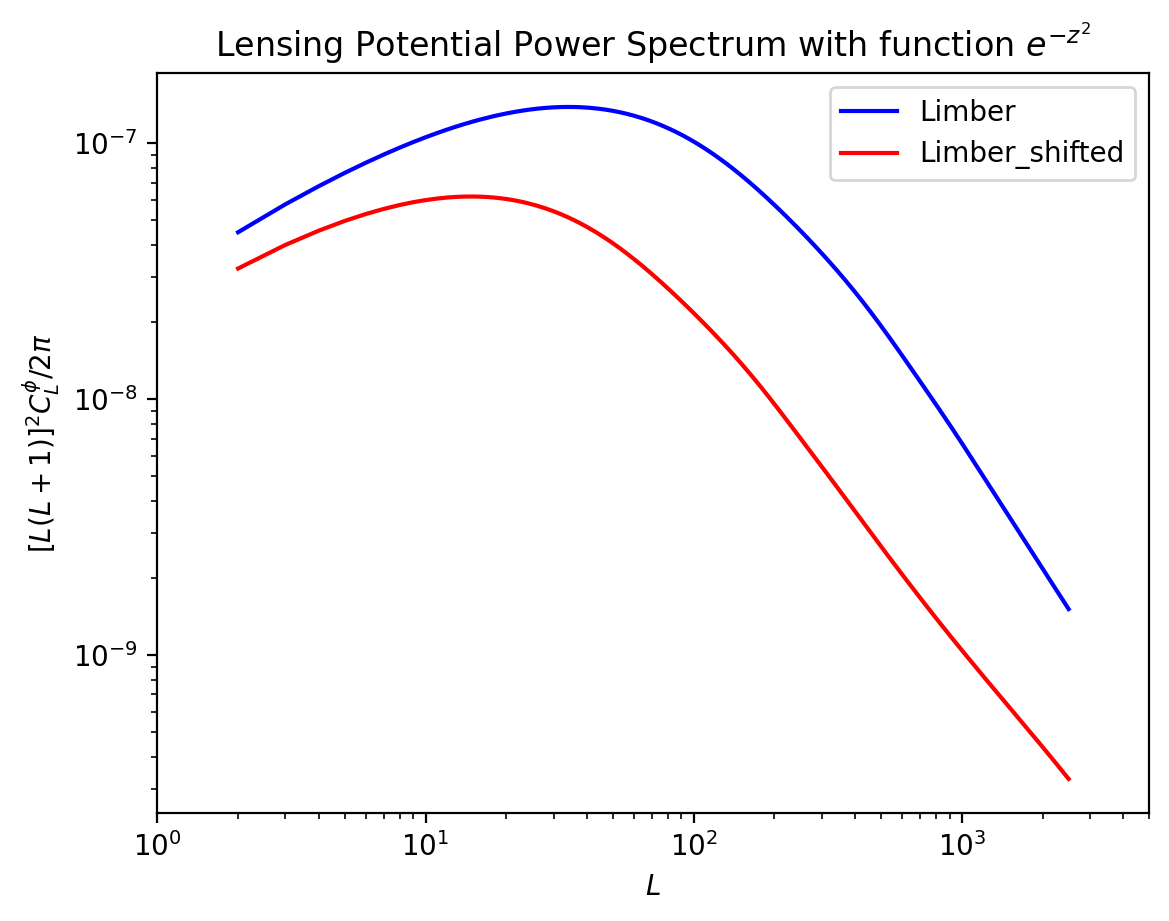

In [13]:
plt.loglog(ls,cl_limber, color='b')
plt.loglog(ls,cl_limber_shifted, color='r')
plt.xlim([1,5000])
plt.legend(['Limber','Limber_shifted'])
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.title('Lensing Potential Power Spectrum with function $e^{-z^{2}}$')
plt.xlabel('$L$');

<span style='background:yellow'>
Power Spectrum    

# Power Spectrum Using Sigmoid Function

<div style="font-size: 30px">
\begin{gather*}
  C^\phi_l = \frac{8\pi^2}{l^3} \int_0^{\chi*} dk\chi f(z)P(z,k) (\frac{\chi*-\chi}{\chi*\chi})^2
\end{gather*}
$$
Let's \ take f(z) = \frac{1}{1+e^{-z}}. Where, z \ is \ a \ function \ of \ \chi *
$$

In [42]:
#Sigmoid_Function
# def sigmoid(zs,Derivative=False):
#     if not Derivative:
#         return 1 / (1 + np.exp (-zs))
#     else:
#         x = sigmoid(zs)
#         return x * (1 - x)
# f_sigmoid = sigmoid(zs,Derivative=False)
# plt.plot(f_sigmoid)
# plt.ylabel('f(z)', fontsize=20)
# plt.xlabel('z', fontsize=20)
# plt.xlim(left=-1)
# max(f), max(zs), zs[2498]

In [16]:
## Shifted Limber with sigmoid function f(z) = 1/(1+exp(-z))
cl_kappa_shifted2=np.zeros(ls.shape)
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa_shifted2[i] = np.dot(dchis, w*f_sigmoid*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa_shifted2*= (ls*(ls+1))**2

In [17]:
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
cl_limber_shifted2= 4*cl_kappa_shifted2/2/np.pi

Distance between curves: 2.296316794122888e-10


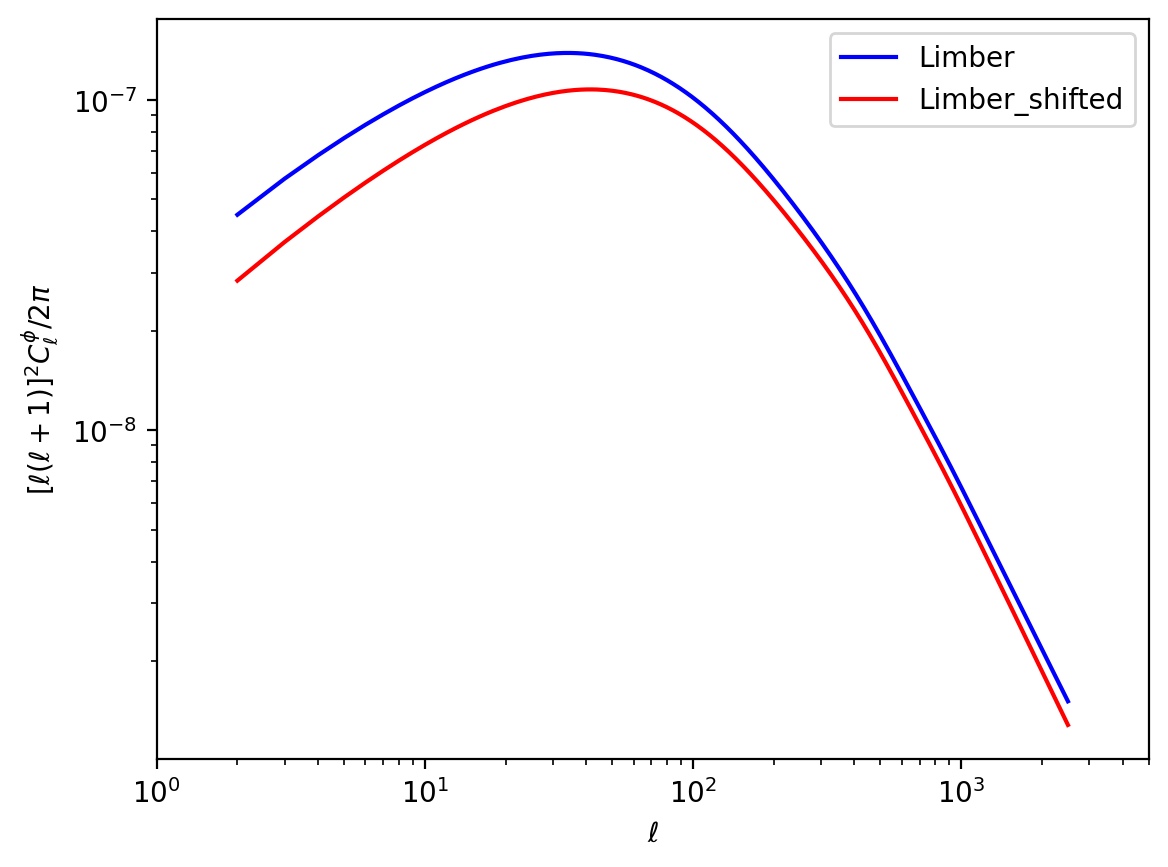

In [18]:
plt.loglog(ls,cl_limber, color='b')
plt.loglog(ls,cl_limber_shifted2, color='r')
plt.xlim([1,5000])
print(f"Distance between curves: {min(cl_limber-cl_limber_shifted2)}")
plt.legend(['Limber','Limber_shifted'])
plt.ylabel('$[\ell(\ell+1)]^2C_\ell^{\phi}/2\pi$')
plt.xlabel('$\ell$');

# Part C

In [7]:
def piecewise_fit(x,zc,fo):
    if x<zc:
        y = (1-fo)*x/zc +fo
        print(y)
        return y
        
    elif x>=zc:
        y = 1
        return y

In [8]:
A =[]
for x in zs:
    c=piecewise_fit(x,3,0.3)
    A.append(c)

0.3018247500438453
0.3036563435716281
0.30549488753492027
0.3073404902121791
0.3091932611396157
0.3110533111274598
0.31292075227653754
0.3147956979951746
0.3166782630164226
0.3185685634156262
0.3204667166283252
0.3223728414685054
0.3242870581472062
0.32620948829148183
0.3281402549637377
0.33007948268143683
0.33202729743718656
0.3339838267192176
0.3359491995322614
0.33792354641882266
0.33990699948087544
0.3418996924019741
0.34390176046979054
0.3459133405990935
0.3479345713551725
0.3499655929777136
0.3520065474051414
0.3540575782994337
0.35611883107141973
0.3581904529065685
0.3602725927912798
0.3623654015396906
0.3644690318210019
0.3665836381873364
0.368709377102149
0.37084640696918525
0.3729948881620099
0.3751549830541152
0.37732685604962085
0.3795106736145751
0.3817066043088719
0.38391481881880096
0.3861354899902362
0.38836879286248194
0.39061490470278637
0.39287400504154324
0.39514627570818917
0.39743190086781577
0.3997310670585087
0.4020439632294352
0.4043707807796909
0.4067117135979

In [7]:
zs.size

398

In [8]:
# # log = -like.log_likelihood(cl_dict)
# # l=np.concatenate((zero,[log]))
# # l=np.reshape(l,(3,13))
# np.full_like(float(4),5.91314526140623)

Text(35, 147, '$f_0$')

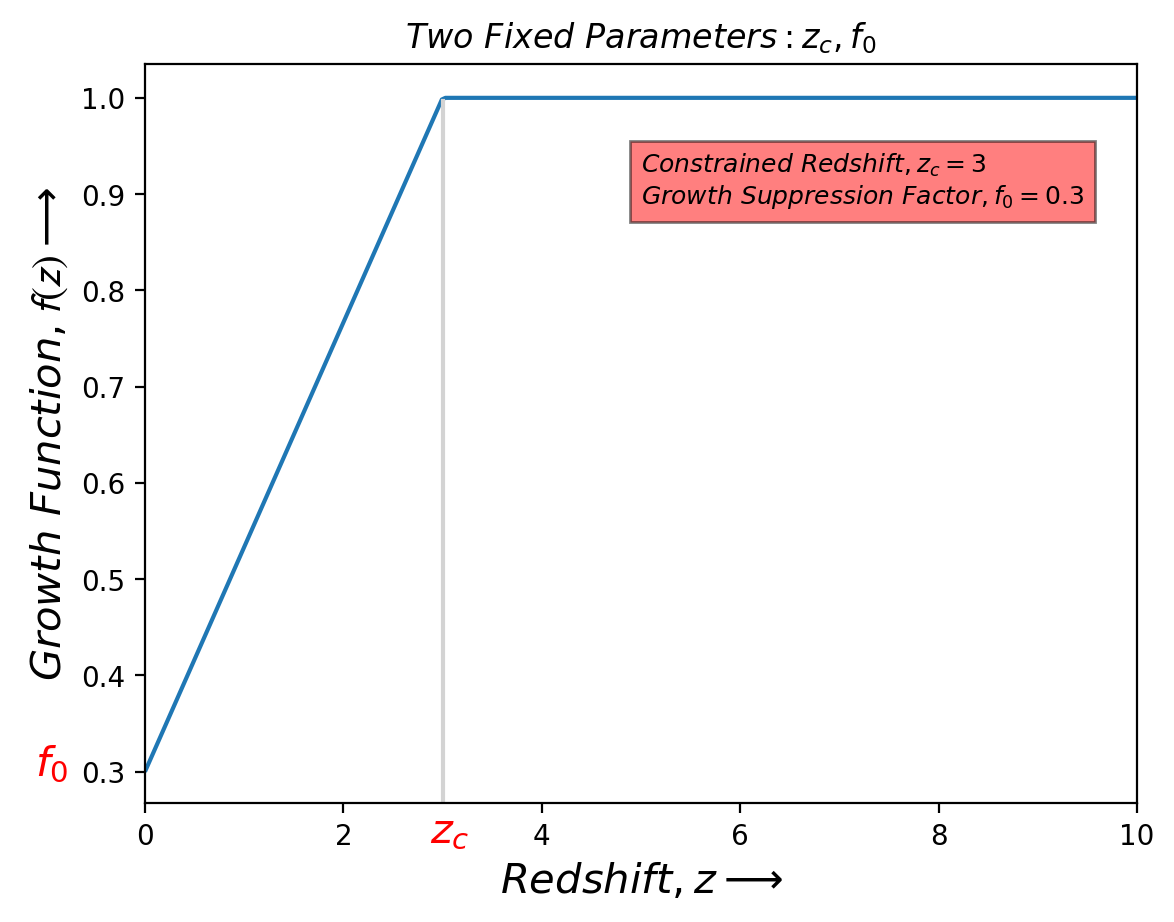

In [9]:
plt.xlim(0,10)
plt.plot(zs,A)
plt.title("$Two \ Fixed \ Parameters: z_c, f_0$")
plt.xlabel('$Redshift, z \longrightarrow$',size=15)
plt.ylabel('$Growth \ Function, \mathcal{f(z)} \longrightarrow$',size=15)
# plt.text(6.6,0.9,"$Transitional \ Redshift, z_c$=3",color='r',weight='bold',size=9)
# plt.text(6.9,0.85,"$Growth \ Factor, f_0$=0.5",color='r',weight='bold',size=9)
plt.axvline(x=3,ymin=0,ymax=0.95, color="lightgray")
plt.text(5.0, 0.89, '$Constrained \ Redshift, z_c=3$'
         "\n"'$Growth \ Suppression \ Factor, f_0=0.3$', fontsize = 9, bbox = dict(facecolor = 'red', alpha = 0.5))
plt.annotate("$z_c$",xy=(430,80),xycoords="figure pixels",color='r',weight='bold',size=15)
plt.annotate("$f_0$",xy=(35,147),xycoords="figure pixels",color='r',weight='bold',size=15)

Distance between curves: 1.2259901237426076


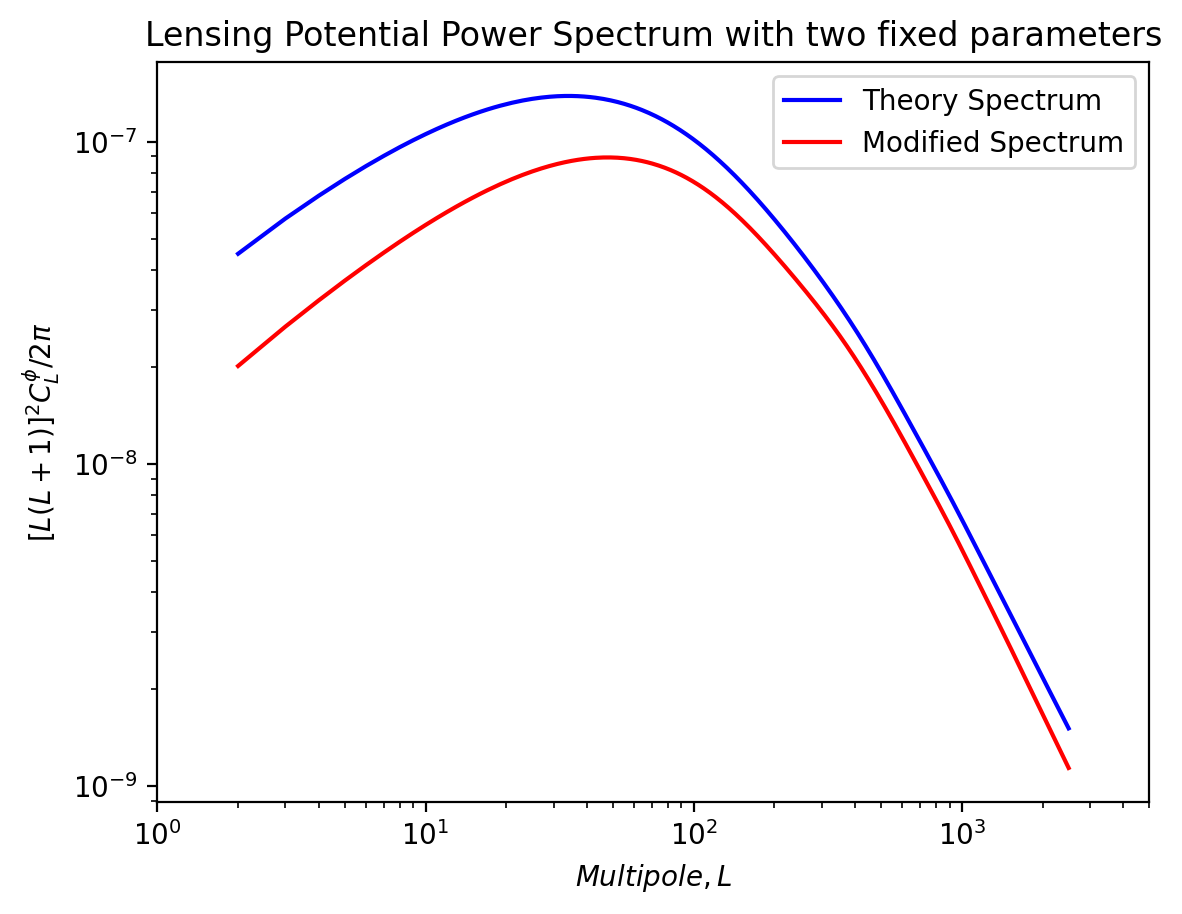

In [10]:
ls = np.arange(2,2500+1, dtype=np.float64)
cl_kappa_shifted3=np.zeros(ls.shape)
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa_shifted3[i] = np.dot(dchis, w*A*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa_shifted3*= (ls*(ls+1))**2
    
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
cl_limber_shifted3= 4*cl_kappa_shifted3/2/np.pi
plt.loglog(ls,cl_limber, color='b')
plt.loglog(ls,cl_limber_shifted3, color='r')
plt.xlim([1,5000])
print(f"Distance between curves: {min(cl_limber/cl_limber_shifted3)}")
plt.legend(['Theory Spectrum','Modified Spectrum'])
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.title('Lensing Potential Power Spectrum with two fixed parameters')
plt.xlabel('$Multipole, L$');

In [22]:
len(cl_limber)

2499

In [17]:
pd.DataFrame(cl_limber_shifted3)

,0
0,2.721216e-08
1,3.554505e-08
2,4.242920e-08
3,4.836809e-08
4,5.358442e-08
...,...
2494,1.247963e-09
2495,1.247123e-09
2496,1.246284e-09
2497,1.245446e-09


# Cobaya: Cosmological Likelihood

In [26]:
# Cosmological likelihood using likelihood function

In [11]:
def function(x,z1,f1):
    a=np.ones(x.shape)
    a[x<z1] = (1-f1)*x[x<z1]/z1+f1
    return a

(0.0, 10.0)

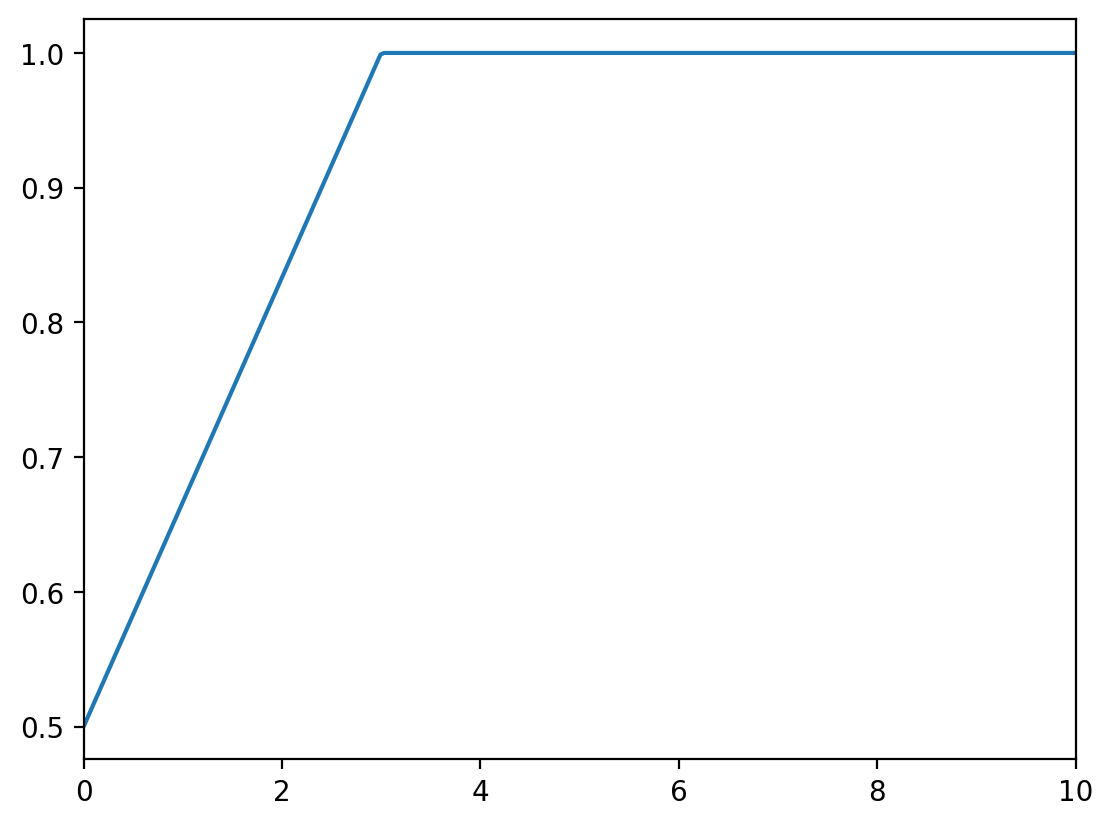

In [12]:
plt.plot(zs,function(zs,3,0.5))
plt.xlim(0,10)

In [13]:
def get_cl_limber(zc,fo):
    cl_kappa4=np.zeros(ls.shape)
    g=function(zs,zc,fo)
    for i, l in enumerate(ls):
        k=(l+0.5)/chis
        w[:]=1
        w[k<1e-4]=0
        w[k>=kmax]=0
        cl_kappa4[i] = np.dot(dchis, w*g*PK.P(zs, k, grid=False)*win/k**4)
    cl_kappa4*= (ls*(ls+1))**2
    cl_limber4= 4*cl_kappa4/2/np.pi
    return cl_limber4

In [14]:
f=np.arange(0,2,0.09)
z=np.arange(0,3,0.09)
like = PlanckLensingMarged()
zero=np.zeros((len(z),len(f)))
log_likelihood1 = zero

for i,zc in enumerate(z):
    for j,fo in enumerate(f):
        cl_limber = get_cl_limber(zc,fo)
        cl_limber = np.array(cl_limber)
#         print(cl_limber)
        cl_test = np.concatenate(([0,0], cl_limber.flatten()))
        cl_dict = {'pp': cl_test}
#     print('chi2 = ',-2*like.log_likelihood(cl_dict, A_planck=1.0))
        log = -like.log_likelihood(cl_dict)
        
        log_likelihood1[i,j] = log
#         print(log_likelihood[i,j])

# Cobaya: MCMC sampler

In [13]:
f0= np.arange(0,2,0.4)
zc=np.arange(0,3,0.3)
from planck_lensing_external.plancklensing import PlanckLensingMarged
like = PlanckLensingMarged()
def log_likelihood(zc,f0):
    cl_limber = get_cl_limber(zc,f0)
    cl_limber = np.array(cl_limber)
    cl_test = np.concatenate(([0,0], cl_limber.flatten()))
    cl_dict = {'pp': cl_test}
    log = like.log_likelihood(cl_dict)
    return log

In [32]:
info = {"likelihood": {"lensing": log_likelihood}}
info["params"] = {
    "zc": {"prior": {"min": 0, "max": 3}, "ref": 1, "proposal": 0.01,"latex": r"Z_\mathrm{c}"},
    "f0": {"prior": {"min": 0, "max": 2}, "ref": 1, "proposal": 0.01,"latex": r"f_\mathrm{0}"}}

In [33]:
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 100}}

In [34]:
info

{'likelihood': {'lensing': <function __main__.log_likelihood(zc, f0)>},
 'params': {'zc': {'prior': {'min': 0, 'max': 3},
   'ref': 1,
   'proposal': 0.01,
   'latex': 'Z_\\mathrm{c}'},
  'f0': {'prior': {'min': 0, 'max': 2},
   'ref': 1,
   'proposal': 0.01,
   'latex': 'f_\\mathrm{0}'}},
 'sampler': {'mcmc': {'Rminus1_stop': 0.001, 'max_tries': 100}}}

In [35]:
from cobaya.run import run
updated_info, sampler = run(info)

[lensing] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {lensing: 2.72}
[mcmc] Initial point: zc:1, f0:1
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2023-08-03 21:05:35 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.985
[mcmc]  - Convergence of means: R-1 = 6.021281 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.928
[mcmc]  - Convergence of means: R-1 = 7.550408 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-03 21:06:35 : 198 steps taken, and 178 accepted.
[mcmc] Lear

[mcmc] Progress @ 2023-08-03 22:13:30 : 8629 steps taken, and 2048 accepted.
[mcmc] Learn + convergence test @ 2080 samples accepted.
[mcmc]  - Acceptance rate: 0.210
[mcmc]  - Convergence of means: R-1 = 0.013677 after 1664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-03 22:14:30 : 8880 steps taken, and 2104 accepted.
[mcmc] Progress @ 2023-08-03 22:15:30 : 9111 steps taken, and 2158 accepted.
[mcmc] Learn + convergence test @ 2160 samples accepted.
[mcmc]  - Acceptance rate: 0.210
[mcmc]  - Convergence of means: R-1 = 0.017194 after 1728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-03 22:16:30 : 9365 steps taken, and 2207 accepted.
[mcmc] Learn + convergence test @ 2240 samples accepted.
[mcmc]  - Acceptance rate: 0.209
[mcmc]  - Convergence of means: R-1 = 0.021877 after 1792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-03 22:17:31 : 9597

[mcmc]  - Acceptance rate: 0.201
[mcmc]  - Convergence of means: R-1 = 0.004116 after 3200 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-04 00:42:49 : 18441 steps taken, and 4018 accepted.
[mcmc] Progress @ 2023-08-04 00:43:49 : 18737 steps taken, and 4078 accepted.
[mcmc] Learn + convergence test @ 4080 samples accepted.
[mcmc]  - Acceptance rate: 0.201
[mcmc]  - Convergence of means: R-1 = 0.006365 after 3264 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-04 00:44:49 : 19000 steps taken, and 4135 accepted.
[mcmc] Learn + convergence test @ 4160 samples accepted.
[mcmc]  - Acceptance rate: 0.201
[mcmc]  - Convergence of means: R-1 = 0.003664 after 3328 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Progress @ 2023-08-04 00:45:50 : 19258 steps taken, and 4187 accepted.
[mcmc] Learn + convergence test @ 4240 samples accepted.
[mcmc]  - Acceptance rate: 0.201
[mcmc] 

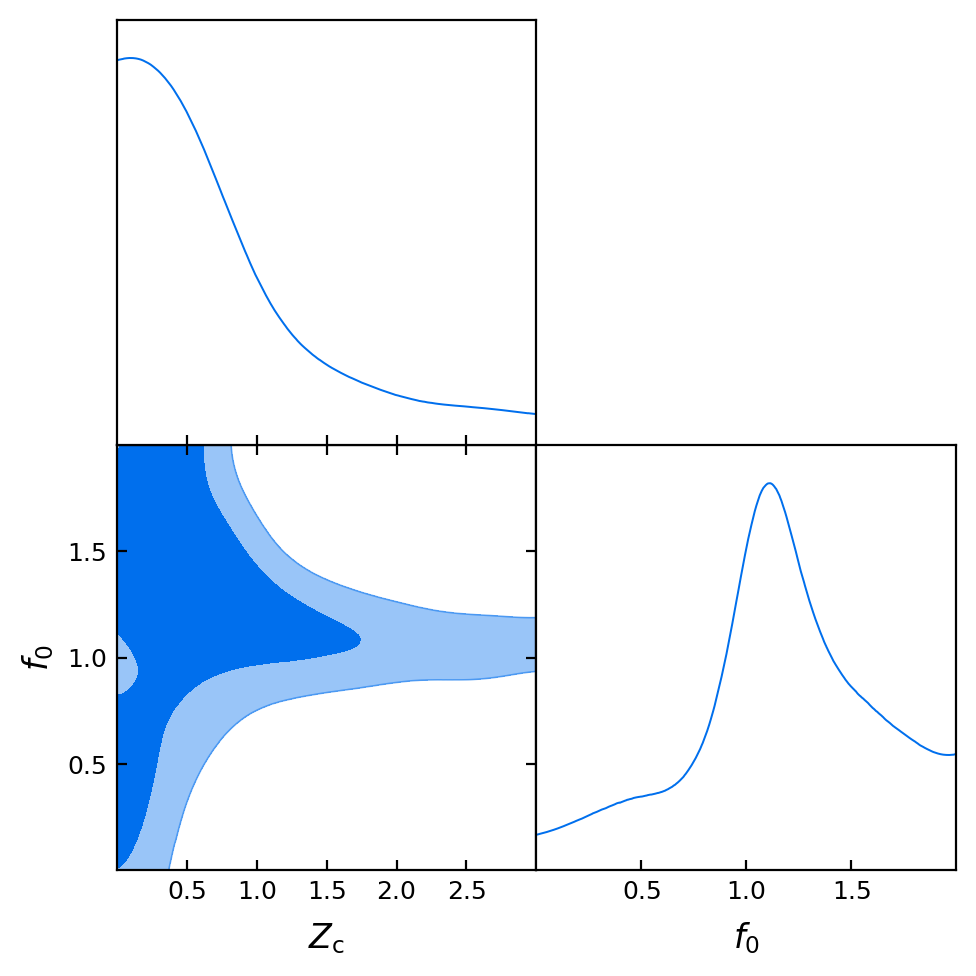

In [36]:
%matplotlib inline
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["zc", "f0"], filled=True)

# Loglikelihood Contour Plot

In [36]:
np.max(Z)

0.016296678075001295

In [37]:
np.exp(-0.5)

0.6065306597126334

In [38]:
one_sigma = np.exp(-0.5)*np.max(Z)
two_sigma = np.exp(-2)*np.max(Z)
one_sigma,two_sigma

(0.009884434903954945, 0.0022055155430961964)

Text(0.5, 1.0, 'Lensing Power Spectrum Likelihood')

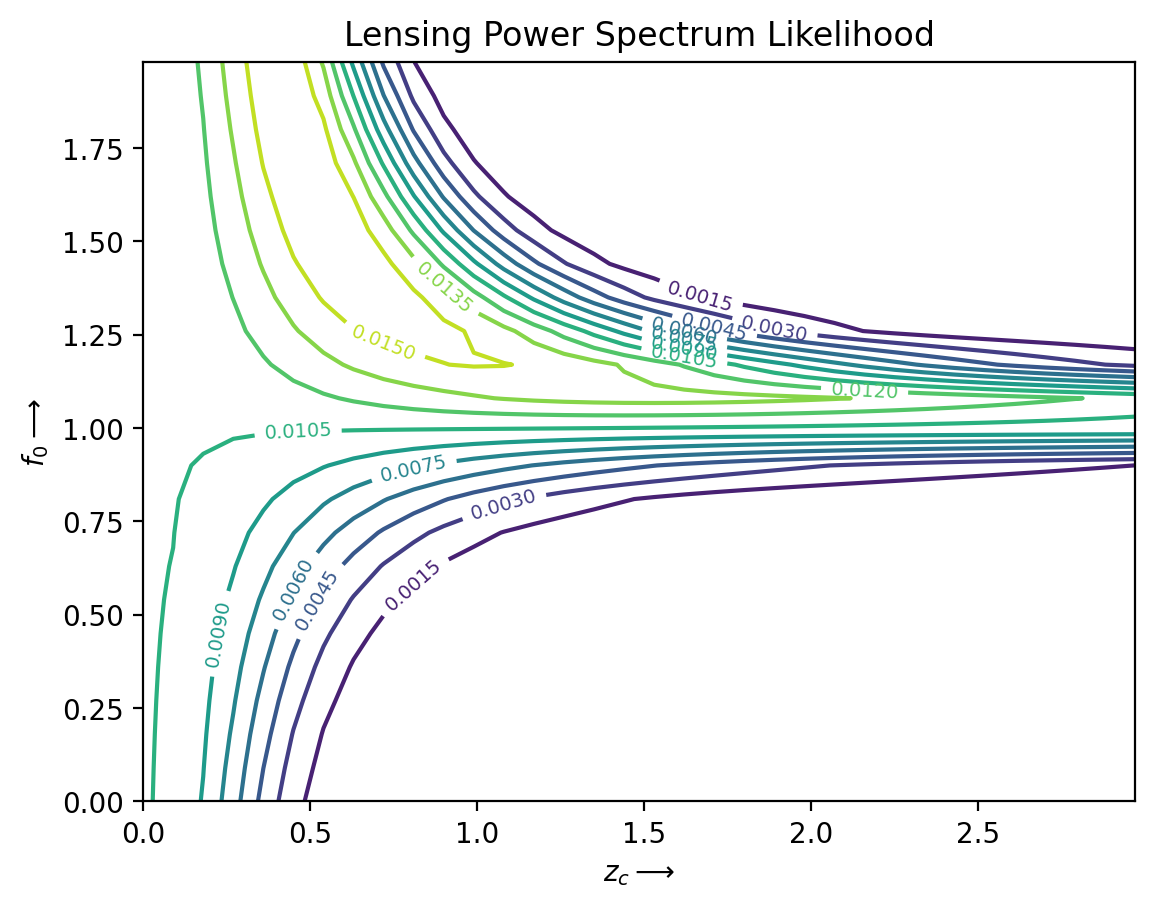

In [15]:
x = z
y = f

X,Y = np.meshgrid(x,y)

Z = np.exp(-log_likelihood1)
# print(Z[:,y==1])
cp=plt.contour(x,y, Z.T,10)
plt.clabel(cp,inline=1,fontsize=7)
plt.ylabel("$f_0 \longrightarrow$")
plt.xlabel("$z_c \longrightarrow$")
plt.title("Lensing Power Spectrum Likelihood")

In [16]:
Z_norm = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
Z_norm.max()

1.0

In [27]:
Z_norm.max()

1.0

In [37]:
integral_norm.max()

1.0

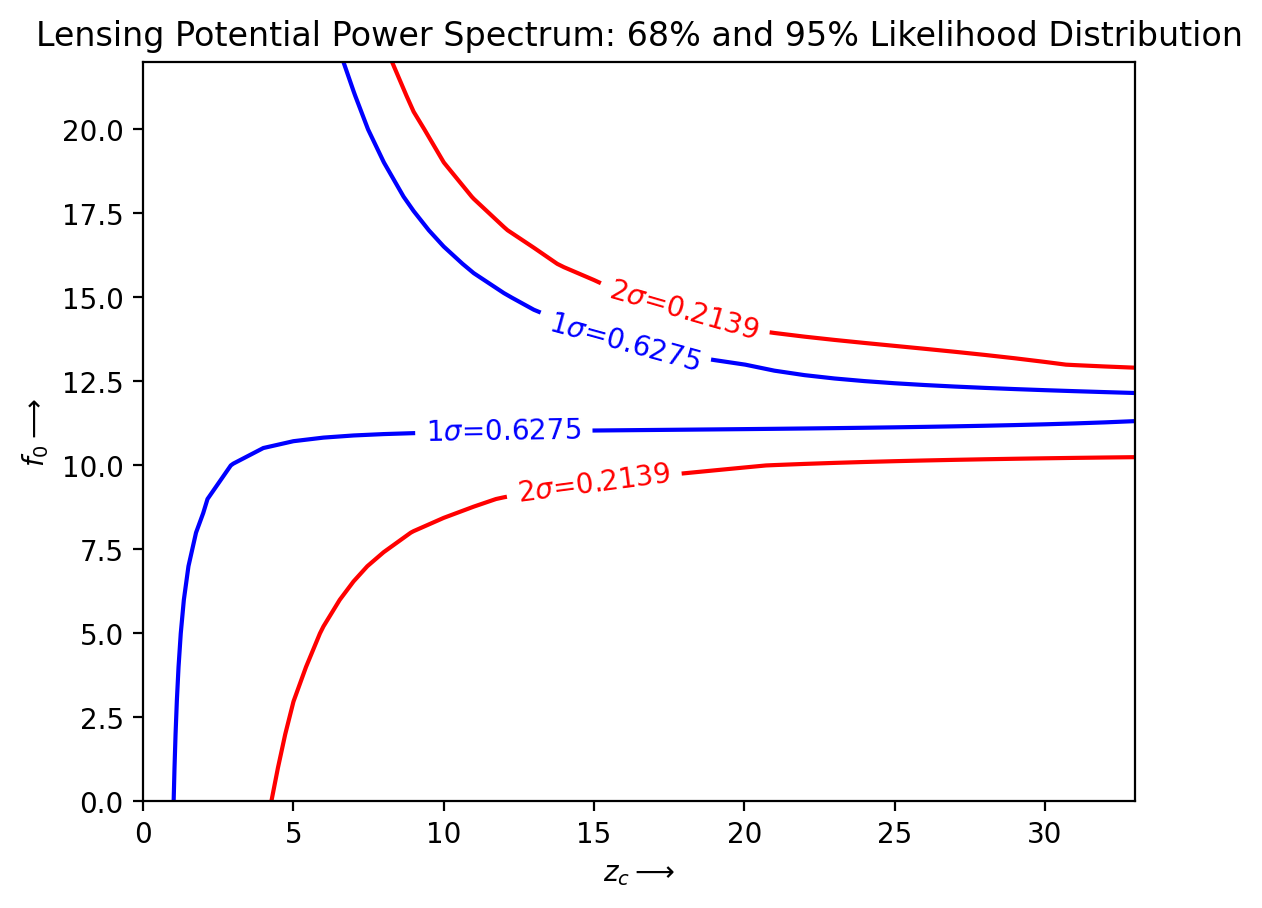

In [20]:
n=1000
t=np.linspace(0,Z_norm.max(),n)
integral=((Z_norm>=t[:,None,None])*Z_norm).sum(axis=(1,2))
from scipy import interpolate
integral_norm = (integral-np.min(integral))/(np.max(integral)-np.min(integral))
f=interpolate.interp1d(integral_norm,t)
t_contours=f(np.array([0.95,0.68]))
cp=plt.contour(Z_norm.T,t_contours,colors=['red','blue'])
#plt.clabel(cp,inline=1,fontsize=7)
fmt = {}
strs = ['$2\sigma$=0.2139','$1\sigma$=0.6275']
for l, s in zip(cp.levels, strs):
    fmt[l] = s

# Label every other level using strings
plt.clabel(cp, cp.levels[::1], inline=True, fmt=fmt, fontsize=10)
plt.ylabel("$f_0 \longrightarrow$")
plt.xlabel("$z_c \longrightarrow$")
plt.title("Lensing Potential Power Spectrum: 68% and 95% Likelihood Distribution")
plt.show()

# 3d Visualization

In [ ]:
x = z
y = f

X,Y = np.meshgrid(x,y)
Z = np.exp(-log_likelihood1)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# plt.contour(x,y, Z.T,i)
ax.plot_surface(X, Y, Z.T, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(X, Y, Z.T, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z.T, 10, lw=3, colors="k", linestyles="solid")
# plt.ylabel("$fo \longrightarrow$")
# plt.xlabel("$zc \longrightarrow$")

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

def init():
    # Plot the surface.
    ax.set_title("3d view")
    ax.plot_surface(X, Y, Z.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,)
    ax.set_xlabel("$Z_c$",size=15)
    ax.set_ylabel("$f_0$",size=15)
    ax.set_zlabel("Likelihood",size=15)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=100, blit=True)


In [ ]:
fn = '3D_Likelihood'

In [ ]:
rcParams['animation.convert_path']=r'/usr/bin/convert'

In [ ]:
# ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
ani.save("Likelihood_3d.gif",writer='imagemagick',fps=30)

In [ ]:
plt.rcParams['animation.html'] = 'html5'
ani

# S8 Plot 

In [18]:
# Save to file
import tempfile, os
tempdir = os.path.join(tempfile.gettempdir(),'testchaindir')
if not os.path.exists(tempdir): 
    os.makedirs(tempdir)
rootname = os.path.join(tempdir, 'testchain')
gdsamples.saveAsText(rootname)

In [19]:
g = plots.get_single_plotter(chain_dir=tempdir, width_inch=4)

<Figure size 400x300 with 0 Axes>

In [20]:
results = camb.get_results(pars)
# sigma = np.sqrt(fo)*sigma_8_0

In [28]:
f

array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ,
       0.99, 1.08, 1.17, 1.26, 1.35, 1.44, 1.53, 1.62, 1.71, 1.8 , 1.89,
       1.98])

Text(44.44444444444444, 0.5, 'Posterior')

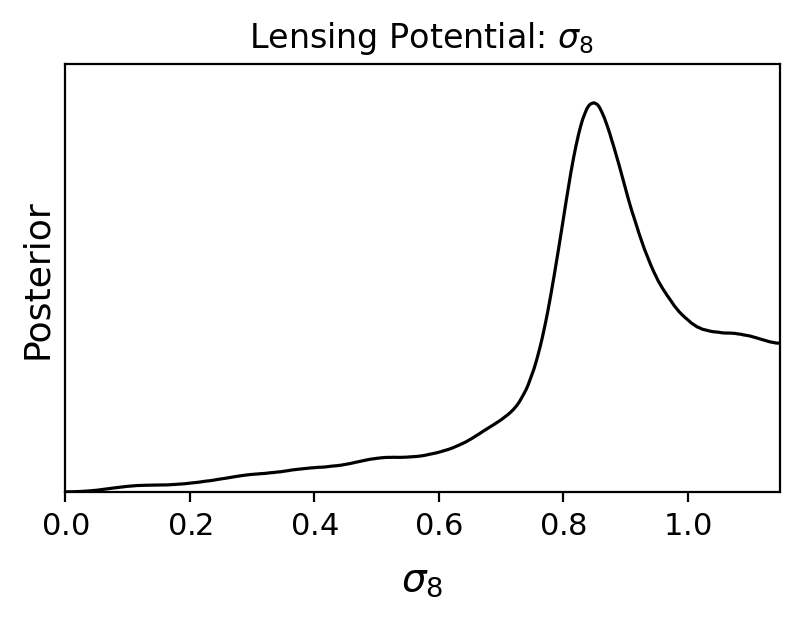

In [28]:
# You can also load a samples object from the chain directories for further manipulation
read_samples = gdsamples
p=read_samples.getParams()

s=results.get_sigma8_0()
sigma=np.sqrt(p.f0)*s
read_samples.addDerived(np.abs(sigma), name='sig', label='\u03C3_{8}', range=[0,np.sqrt(2)*s])
g.new_plot()
g.plot_1d(read_samples,'sig');
plt.title("Lensing Potential: $\u03C3_8$ ")
plt.ylabel('Posterior',size=13)

# PART II 

# Modified Non-linear Power Spectrum

In [ ]:
from camb import nonlinear, modifiednonlinear, set_params

In [ ]:
pars = camb.CAMBparams()
pars_modified = camb.CAMBparams()

In [ ]:
pars_modified.NonLinearModel.set_params(Zc=7,fo=0.8)

In [ ]:
pars=camb.read_ini(os.path.join(camb_path,'inifiles','planck_2018.ini'))
pars_modified=camb.read_ini(os.path.join(camb_path,'inifiles','planck_2018.ini'))
pars_modified.NonLinearModel.set_params(Zc=7,fo=0.8)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.8], kmax=2.0)
pars_modified.set_matter_power(redshifts=[0.8], kmax=2.0)
#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results1 = camb.get_results(pars)
results1.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)


#Modified non-Linear spectra (Halofit)
pars_modified.NonLinear = model.NonLinear_both
results2 = camb.get_results(pars_modified)
results2.calc_power_spectra(pars_modified)
kh_nonlin_modified, z_nonlin_modified, pk_nonlin_modified = results2.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [ ]:
for i, (redshift, line) in enumerate(zip(z,['-'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='red', ls = line)
    plt.loglog(kh_nonlin_modified, pk_nonlin_modified[i,:], color='blue', ls = line)
plt.xlabel('k/h Mpc');
plt.ylabel(r'P(Zc,fo)')
plt.title(r'Modified matter power spectrum at Zc=7,fo=0.8')
plt.legend(['linear','non-linear','modified non-linear'], loc='lower left');

In [ ]:
nz = 400 #number of steps to use for the radial/redshift integration
kmax=20  #kmax to use
chistar = results.conformal_time(0)- results.tau_maxvis
chistar1 = results1.conformal_time(0)- results1.tau_maxvis
chistar2 = results2.conformal_time(0)- results2.tau_maxvis
chis = np.linspace(0,chistar,nz)
chis1 = np.linspace(0,chistar1,nz)
chis2 = np.linspace(0,chistar2,nz)
zs=results.redshift_at_comoving_radial_distance(chis)
zs1=results1.redshift_at_comoving_radial_distance(chis1)
zs2=results1.redshift_at_comoving_radial_distance(chis2)
dchis = (chis[2:]-chis[:-2])/2
dchis1 = (chis1[2:]-chis1[:-2])/2
dchis2 = (chis2[2:]-chis2[:-2])/2
chis = chis[1:-1]
chis1 = chis1[1:-1]
chis2 = chis2[1:-1]

zs = zs[1:-1]
zs1 = zs1[1:-1]
zs2 = zs2[1:-1]

#Get the matter power spectrum interpolation object (based on RectBivariateSpline). 
#Here for lensing we want the power spectrum of the Weyl potential.
PK = camb.get_matter_power_interpolator(pars, nonlinear=False, 
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs[-1])
PK1 = camb.get_matter_power_interpolator(pars, nonlinear=True, 
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs1[-1])
PK2 = camb.get_matter_power_interpolator(pars_modified, nonlinear=True, 
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs2[-1])

In [ ]:
#Get lensing window function (flat universe)
win = ((chistar-chis)/(chis**2*chistar))**2
win1 = ((chistar1-chis1)/(chis1**2*chistar1))**2
win2 = ((chistar2-chis2)/(chis2**2*chistar2))**2

#Do integral over chi
ls = np.arange(2,2500+1, dtype=np.float64)

cl_kappa=np.zeros(ls.shape)
cl_kappa1=np.zeros(ls.shape)
cl_kappa2=np.zeros(ls.shape)

w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
w1 = np.ones(chis1.shape) #this is just used to set to zero k values out of range of interpolation
w2 = np.ones(chis2.shape) #this is just used to set to zero k values out of range of interpolation

for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa*= (ls*(ls+1))**2

for i, l in enumerate(ls):
    k1=(l+0.5)/chis1
    w1[:]=1
    w1[k1<1e-4]=0
    w1[k1>=kmax]=0
    cl_kappa1[i] = np.dot(dchis1, w1*PK1.P(zs1, k1, grid=False)*win1/k1**4)
cl_kappa1*= (ls*(ls+1))**2

for i, l in enumerate(ls):
    k2=(l+0.5)/chis2
    w2[:]=1
    w2[k2<1e-4]=0
    w2[k2>=kmax]=0
    cl_kappa2[i] = np.dot(dchis2, w2*PK2.P(zs2, k2, grid=False)*win2/k2**4)
cl_kappa2*= (ls*(ls+1))**2

In [ ]:
#Compare with CAMB's calculation:
#note that to get CAMB's internal calculation accurate at the 1% level at L~2000, 
#need lens_potential_accuracy=2. Increase to 4 for accurate match to the Limber calculation here
pars.set_for_lmax(2500,lens_potential_accuracy=2)
pars.set_for_lmax(2500,lens_potential_accuracy=2)
pars_modified.set_for_lmax(2500,lens_potential_accuracy=2)

results = camb.get_results(pars)
results1 = camb.get_results(pars)
results2 = camb.get_results(pars_modified)

#Make plot. Expect difference at very low-L from inaccuracy in Limber approximation, and
#very high L from differences in kmax (lens_potential_accuracy is only 2, though good by eye here)
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
cl_limber1= 4*cl_kappa1/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
cl_limber2= 4*cl_kappa2/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)

plt.loglog(ls,cl_limber, color='b')
plt.loglog(ls, cl_limber1, color='r')
plt.loglog(ls, cl_limber2, color='black')


plt.xlim([1,5000])
plt.legend(['linear','nonlinear', 'modified nonlinear'], loc='lower left')
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.title('Lensing Potential Power Spectrum ')
plt.xlabel('$Multipole, L$');